In [ ]:
# Import relevent modules/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
"""
dV/dt = -k*A
V = (4/3)*pi*r**3
A = 4*pi*r**2
""" 
# Functions: 
def radius_analytical(t): 
  return -k*t+ 2.5

def get_radius_from_vol(V):
  pi = np.pi 
  return ( 3*V / (4*pi) )**(1/3)

def get_vol_from_radius(r):
  pi = np.pi 
  return (4/3)*pi*r**3

# Define function to be integrated: 
def Vdot(V): 
  pi = np.pi
  r = get_radius_from_vol(V)
  return -4*pi*k*r**2 

# Build function for Euler's method integration: 
def integrate_euler(F,y0,x0,xStop,h):
  x = np.arange(x0,xStop+h,h) 
  y = np.zeros(x.shape[0])
  for i in range(x.shape[0]): 
    if i == 0: 
      y[0] = y0
    elif i > 0: 
      y[i] = y[i-1] + F(y[i-1]) * h
  data = np.column_stack((x,y))
  return data




In [ ]:
# Define model variables, parameters, etc.: 
h = 0.25                              # stepsize 
#t = np.arange(0,10,h)                 # time steps
k = 0.08 #mm/min                      # rate constantr_init = 2.5                    
t_init = 0
r_init = 2.5                          # mm 
V_init = get_vol_from_radius(r_init)  # mm^3

# Display some useful information: 
print(f'inital raidus = {r_init} mm')
print(f'inital Volume = {V_init} mm^3\n')

# Solve numerically: 
res = integrate_euler(Vdot,V_init,t_init,10,h)

# format as dataframe:
res = pd.DataFrame(res,columns=['time_step','V_num'])

# Solve analytically: 
V_analytical = get_vol_from_radius(radius_analytical(res.time_step))
res['V_anly'] = V_analytical
res['RelError'] = 100 * np.abs(res.V_anly - res.V_num)/res.V_anly

print(res)

inital raidus = 2.5 mm
inital Volume = 65.44984694978736 mm^3

    time_step      V_num     V_anly  RelError
0        0.00  65.449847  65.449847  0.000000
1        0.25  63.879051  63.891583  0.019616
2        0.50  62.333489  62.358252  0.039711
3        0.75  60.812958  60.849651  0.060300
4        1.00  59.317257  59.365579  0.081397
5        1.25  57.846182  57.905836  0.103019
6        1.50  56.399531  56.470220  0.125180
7        1.75  54.977100  55.058531  0.147899
8        2.00  53.578687  53.670567  0.171192
9        2.25  52.204090  52.306127  0.195077
10       2.50  50.853105  50.965010  0.219573
11       2.75  49.525530  49.647016  0.244700
12       3.00  48.221162  48.351943  0.270477
13       3.25  46.939798  47.079589  0.296926
14       3.50  45.681235  45.829755  0.324069
15       3.75  44.445270  44.602238  0.351928
16       4.00  43.231701  43.396838  0.380528
17       4.25  42.040325  42.213354  0.409893
18       4.50  40.870938  41.051585  0.440049
19       4.75  39

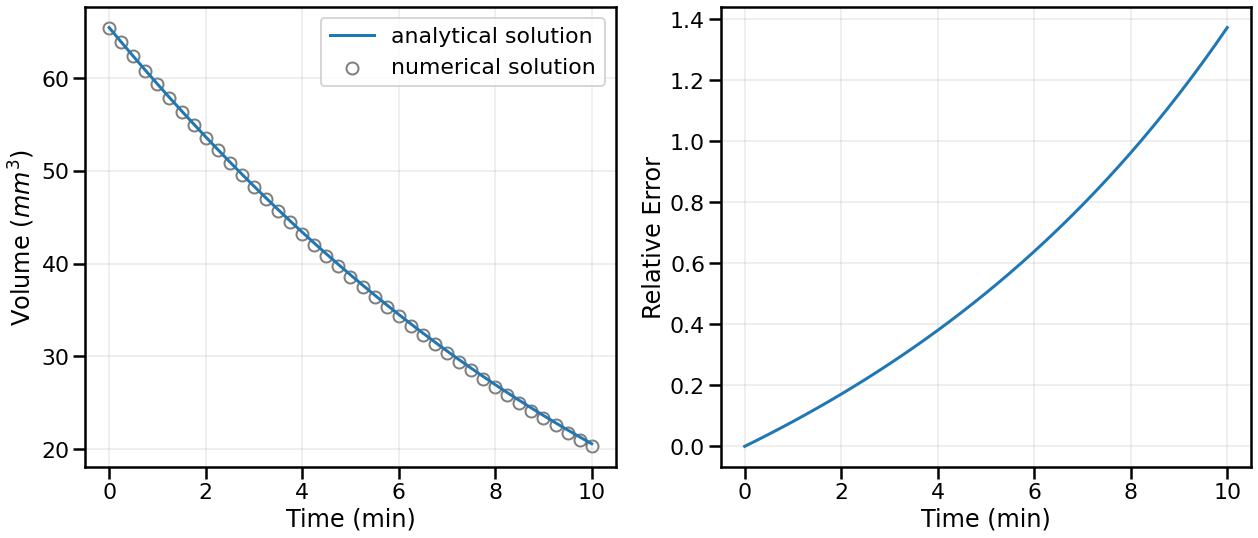

In [ ]:
# Plot results: 
sb.set_context('poster')
fig, axes = plt.subplots(1,2,squeeze=True,figsize=(18,8))
ax =axes[0]
ax.plot(res.time_step,res.V_anly,label='analytical solution')
ax.scatter(res.time_step,res.V_num,fc='w',ec='k',alpha=0.5,label='numerical solution')
ax.set_ylabel(r'Volume ($mm^3$)')
ax.set_xlabel('Time (min)')
ax.grid(True,alpha=0.2)
ax.legend()

ax = axes[1]
ax.plot(res.time_step,res.RelError)
ax.set_ylabel('Relative Error')
ax.set_xlabel('Time (min)')
ax.grid(True,alpha=0.2)


fig.tight_layout()

In [ ]:
V_final = res.V_num.iloc[-1]
r_final = get_radius_from_vol(V_final)

k_backcal = (2.5 - r_final)/10

print(f'Volume final = {V_final} mm^3 ')
print(f'Radius final = {r_final} mm')
print(f'Known Evaportation Rate = {k}')
print(f'Evaporation Rate via backcalculation = {k_backcal}')


Volume final = 20.296899087495436 mm^3 
Radius final = 1.6921818310832484 mm
Known Evaportation Rate = 0.08
Evaporation Rate via backcalculation = 0.08078181689167516
